### Genetic Algorithm

In [4]:
import numpy as np
from ypstruct import structure

def run(problem, params):
    
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar
    varmin = problem.varmin
    varmax = problem.varmax

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    for i in range(npop):
        pop[i].position = np.random.uniform(varmin, varmax, nvar)
        pop[i].cost = costfunc(pop[i].position)
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
        if avg_cost != 0:
            costs = costs/avg_cost
        probs = np.exp(-beta*costs)

        popc = []
        for _ in range(nc//2):

            # Select Parents
            #q = np.random.permutation(npop)
            #p1 = pop[q[0]]
            #p2 = pop[q[1]]

            # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]
            
            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)

            # Apply Bounds
            apply_bound(c1, varmin, varmax)
            apply_bound(c2, varmin, varmax)

            # Evaluate First Offspring
            c1.cost = costfunc(c1.position)
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            c2.cost = costfunc(c2.position)
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)
        

        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("Iteration {}: Best Cost = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    return out

def crossover(p1, p2, gamma=0.1):
    c1 = p1.deepcopy()
    c2 = p1.deepcopy()
    alpha = np.random.uniform(-gamma, 1+gamma, *c1.position.shape)
    c1.position = alpha*p1.position + (1-alpha)*p2.position
    c2.position = alpha*p2.position + (1-alpha)*p1.position
    return c1, c2

def mutate(x, mu, sigma):
    y = x.deepcopy()
    flag = np.random.rand(*x.position.shape) <= mu
    ind = np.argwhere(flag)
    y.position[ind] += sigma*np.random.randn(*ind.shape)
    return y

def apply_bound(x, varmin, varmax):
    x.position = np.maximum(x.position, varmin)
    x.position = np.minimum(x.position, varmax)

def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]


ModuleNotFoundError: No module named 'ypstruct'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure
#import ga

# Rastrigin Test Function
def rastrigin(x):
    return sum(x**2-10*np.cos(2*np.pi*x))

# Knapsack Function
def knapsack():
    return 0

# Sphere Test Function
def sphere(x):
    return sum(x**2)

# Problem Definition
problem = structure()
problem.costfunc = rastrigin
#problem.costfunc = sphere
problem.nvar = 5
problem.varmin = [-10, -10, -1, -5,  4]
problem.varmax = [ 10,  10,  1,  5, 10]

# GA Parameters
params = structure()
params.maxit = 100
params.npop = 50
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.01
params.sigma = 0.1

# Run GA
#out = ga.run(problem, params)
out = run(problem, params)

# Results
plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0, params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm (GA)')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'ypstruct'

### Estimate the number of experiment repeats

In [4]:
from numpy.random import seed
from numpy.random import normal
from numpy import savetxt
# define underlying distribution of results
mean = 60
stev = 10
# generate samples from ideal distribution
seed(1)
results = normal(mean, stev, 1000)
# save to ASCII file
#savetxt('stoch_results.csv', results)

             rmse         mae
count   31.000000   31.000000
mean   115.838097   80.486129
std     26.981694   20.030413
min     73.224000   47.746000
25%     97.855500   65.208500
50%    106.790000   77.929000
75%    132.767000   91.599000
max    171.788000  120.020000


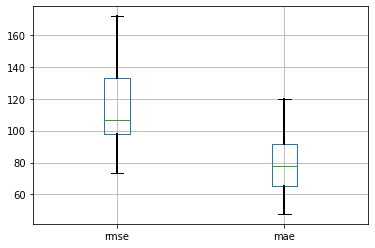

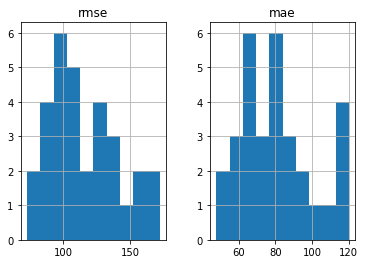

In [11]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
from matplotlib import pyplot
# load results file
results = read_csv('result_multiple_runs.csv', header=0)
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot(whiskerprops = dict(linestyle='-', linewidth=2))
pyplot.show()
# histogram
results.hist()
pyplot.show()

### Fault Injection

#### Investigate the distribution of the data inputs

          pollution           dew          temp         press       wnd_spd  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

               snow          rain  
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


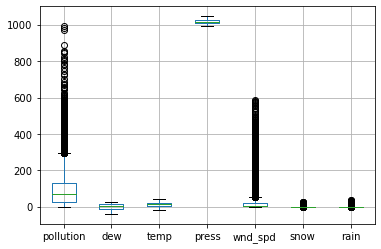

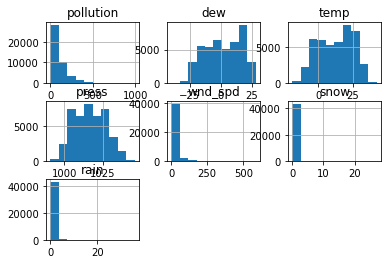

In [62]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
from matplotlib import pyplot
# load results file
results = read_csv('pollution2.csv', header=0)
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

In [63]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from random import seed
from random import randint
from random import random
from matplotlib import pyplot
import numpy
import random
#seed(1)
# load results file
results = read_csv('pollution2.csv', header=0)
#values = results.values
results.drop("wnd_dir", axis=1, inplace=True)
results["annot"] = "clean"
#print(results.describe())

fault_data = [-30.5, -20.5, 0, 15.5, 25.5]# -40<x<28
n = len(results)

for i in range(n):
    p = random.random()
    if p > 0.8:
        results["dew"].iloc[i] = random.choice(fault_data)
        results["annot"].iloc[i] = "random"


results.to_csv("annotated.csv")        
print("File saved")


C:\Users\hayatu4islam\AppData\Local\Temp\ipykernel_6668\2101433725.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["dew"].iloc[i] = random.choice(fault_data)
C:\Users\hayatu4islam\AppData\Local\Temp\ipykernel_6668\2101433725.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["annot"].iloc[i] = "random"


File saved


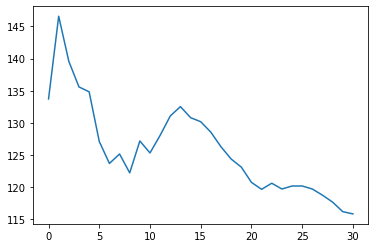

In [17]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from matplotlib import pyplot
import numpy
# load results file
results = read_csv('result_multiple_runs.csv', header=0)
values = results.values
# collect cumulative stats
means = list()
for i in range(1,len(values)+1):
	data = values[0:i, 0]
	mean_rmse = mean(data)
	means.append(mean_rmse)
# line plot of cumulative values
pyplot.plot(means)
pyplot.show()

In [1]:
print("HEllo")

HEllo
